In [1]:
# For auto-reloading external modules see
# http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import numpy
import observations.dimensions.two.sampling as observe
import matplotlib.pyplot as plt
import seaborn as sns

from defaults.plot import *

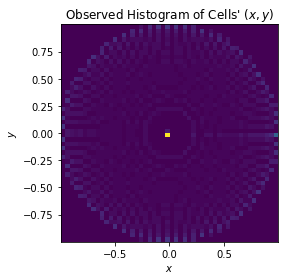

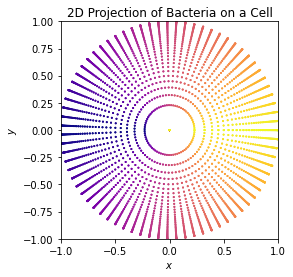

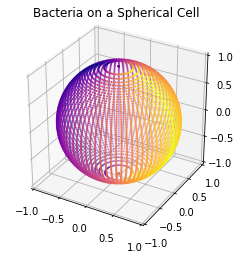

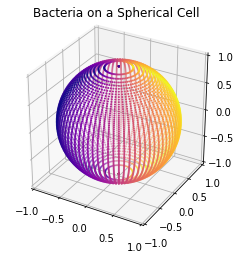

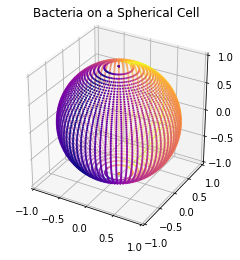

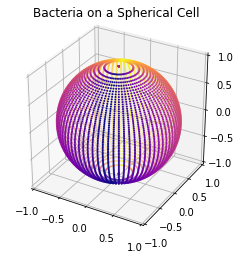

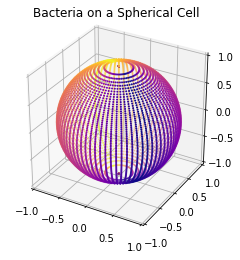

In [4]:
from math import pi, sin, cos, acos
from observations.dimensions.one.sampling import step_sample

samplesize = 75
# based on http://corysimon.github.io/articles/uniformdistn-on-sphere/
# or https://mathworld.wolfram.com/SpherePointPicking.html
# or https://www.bogotobogo.com/Algorithms/uniform_distribution_sphere.php
thetas = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
phis = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)

def numpy_spherical_to_cartesian(arr):
    def helper(arr):
        theta = arr[0]
        phi = arr[1]
        return [sin(phi) * cos(theta), sin(phi) * sin(theta), cos(phi)]

    return numpy.apply_along_axis(helper, 1, arr)

spherical_points = numpy.array(numpy.meshgrid(thetas, phis)).T.reshape(-1, 2)
cartesian_points = numpy_spherical_to_cartesian(spherical_points)
colors = numpy.abs(spherical_points[:, 0] - pi)

# TODO: this figure was created with 500 sample points, bins = 70
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.title(r"Observed Histogram of Cells' $\left(x,y\right)$")
plt.hist2d(cartesian_points[:,0], cartesian_points[:,1], bins=50, rasterized=True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.tight_layout()
plt.savefig("figures/bacteria/density.pdf", dpi=dpi*2/3)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
plt.scatter(cartesian_points[:,0], cartesian_points[:,1], s=1, c=colors, cmap='plasma', rasterized=True)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2D Projection of Bacteria on a Cell", y=0.995)
plt.savefig("figures/bacteria/cell2d.pdf", dpi=dpi*2/3)
plt.show()

delta = 2 * pi / 10
for i in range(5):
    new_theta = (thetas + i * delta) % (2 * pi)
    spherical_points = numpy.array(numpy.meshgrid(new_theta, phis)).T.reshape(-1, 2)
    cartesian_points = numpy_spherical_to_cartesian(spherical_points)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((numpy.ptp(cartesian_points[:,0]), numpy.ptp(cartesian_points[:,1]), numpy.ptp(cartesian_points[:,2])))
    ax.scatter(cartesian_points[:,0], cartesian_points[:,1], cartesian_points[:,2], s=1, c=colors, cmap='plasma', rasterized=True)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    plt.title("Bacteria on a Spherical Cell", y=1.05)
    plt.savefig("figures/bacteria/cell.pdf", dpi=dpi*2/3)
    plt.show()

In [5]:
delta = 2 * pi / 10

thetas0 = numpy.array([step_sample(i, 0, 2 * pi, samplesize) for i in range(samplesize + 1)]).reshape(-1, 1)
thetas1 = (thetas0 + delta) % (2 * pi)
thetas2 = (thetas0 + 2 * delta) % (2 * pi)
phis = numpy.array([acos(step_sample(i, 0, 2, samplesize) - 1) for i in range(samplesize + 1)]).reshape(-1, 1)

cartesian_points0 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas0, phis)).T.reshape(-1, 2))
cartesian_points1 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas1, phis)).T.reshape(-1, 2))
cartesian_points2 = numpy_spherical_to_cartesian(numpy.array(numpy.meshgrid(thetas2, phis)).T.reshape(-1, 2))

measurements = cartesian_points0[:,[0,1]]
measurements = numpy.append(measurements, cartesian_points1[:,[0,1]], axis=1)
measurements = numpy.append(measurements, cartesian_points2[:,[0,1]], axis=1)

print(measurements)

[[ 1.22464680e-16  0.00000000e+00  9.90760073e-17  7.19829328e-17
   3.78436673e-17  1.16470832e-16]
 [ 2.29395340e-01  0.00000000e+00  1.85584729e-01  1.34835198e-01
   7.08870586e-02  2.18167933e-01]
 [ 3.22214559e-01  0.00000000e+00  2.60677054e-01  1.89392966e-01
   9.95697747e-02  3.06444256e-01]
 ...
 [ 3.22214559e-01 -7.89198057e-17  2.60677054e-01  1.89392966e-01
   9.95697747e-02  3.06444256e-01]
 [ 2.29395340e-01 -5.61856539e-17  1.85584729e-01  1.34835198e-01
   7.08870586e-02  2.18167933e-01]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


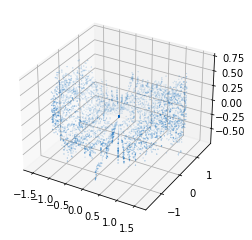

In [6]:
from sklearn.preprocessing import StandardScaler
measurements_scaler = StandardScaler()
measurements_scaled = measurements_scaler.fit_transform(measurements)

from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'full')
#pca.n_components = 3

#%TODO: standardize measurmenets before?
data = pca.fit_transform(measurements_scaled)

pca_scaler = StandardScaler()
measurements_fit = pca_scaler.fit_transform(data)
#TODO: why this??
measurements_fit = measurements_fit[2:]

# todo color based on theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(measurements_fit[:,0], measurements_fit[:,1], measurements_fit[:,2], s=0.01, cmap='cividis', rasterized=True)
plt.show()

In [7]:
print(measurements)
print(measurements_fit)
print(numpy.where(numpy.any(measurements_fit > 30, axis=1)))

[[ 1.22464680e-16  0.00000000e+00  9.90760073e-17  7.19829328e-17
   3.78436673e-17  1.16470832e-16]
 [ 2.29395340e-01  0.00000000e+00  1.85584729e-01  1.34835198e-01
   7.08870586e-02  2.18167933e-01]
 [ 3.22214559e-01  0.00000000e+00  2.60677054e-01  1.89392966e-01
   9.95697747e-02  3.06444256e-01]
 ...
 [ 3.22214559e-01 -7.89198057e-17  2.60677054e-01  1.89392966e-01
   9.95697747e-02  3.06444256e-01]
 [ 2.29395340e-01 -5.61856539e-17  1.85584729e-01  1.34835198e-01
   7.08870586e-02  2.18167933e-01]
 [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[[-0.53922897 -0.0389779  -0.01967875  0.12302885 -0.48052902 -0.14932599]
 [-0.65968518 -0.04768502 -0.20232307 -0.0715745  -0.41898712 -0.12179558]
 [-0.75901086 -0.05486473 -0.12995826  0.0469742  -0.69505136 -0.8651101 ]
 ...
 [-0.53922897 -0.0389779  -0.03809364 -0.03091266  0.20882723 -0.63327022]
 [-0.37882665 -0.0273833   0.07896541 -0.04503427  0.16542612  0.01213807]
 [ 0.017

In [8]:
%%time

import datafold.pcfold as pfold


X_pcm = pfold.PCManifold(measurements_fit)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.20807924791873003, cut-off=1.9577950340504597
Wall time: 3.62 s


Found parsimonious eigenvectors (indices): [1 2 3]
Wall time: 3min 49s


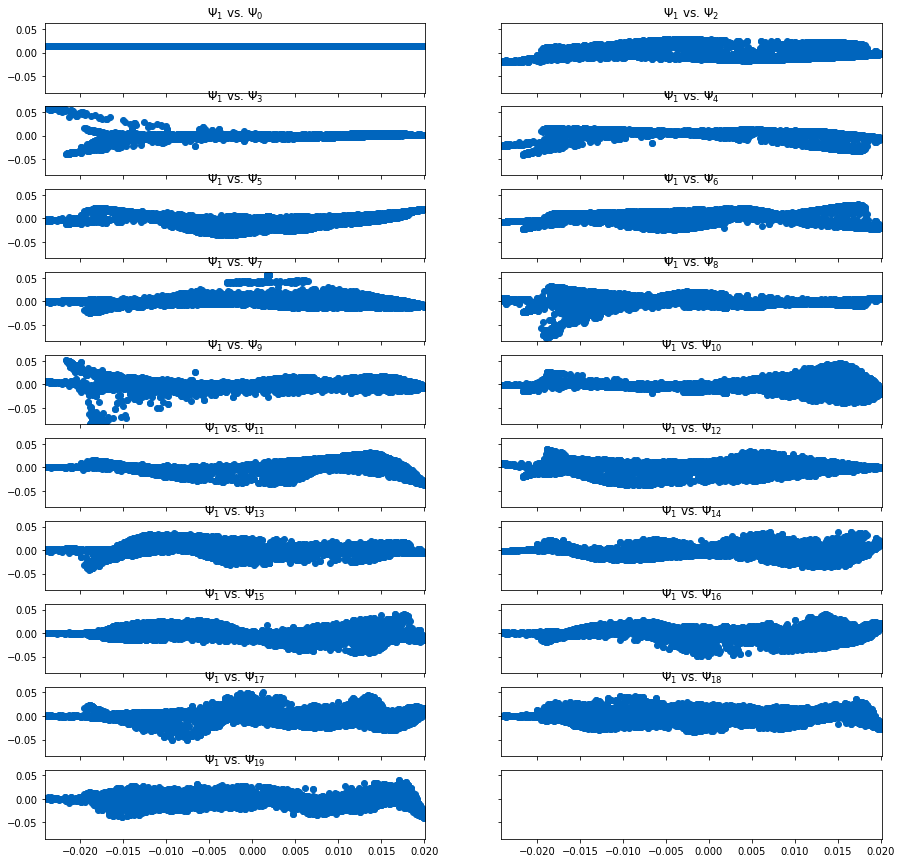

In [9]:
%%time

import datafold.dynfold as dfold

num_eigenpairs = 20

# TODO: also show this plot
#dmap = dfold.DiffusionMaps(
#    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
#    n_eigenpairs=num_eigenpairs,
#    dist_kwargs=dict(cut_off=X_pcm.cut_off),
#)

dmap = dfold.DiffusionMaps(
    kernel=pfold.ContinuousNNKernel(k_neighbor=250, delta=1.0),
    n_eigenpairs=num_eigenpairs
)

dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

from datafold.utils.plot import plot_pairwise_eigenvector
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral),
)

from datafold.dynfold import LocalRegressionSelection

selection = LocalRegressionSelection(
    intrinsic_dim=3, n_subsample=3000, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

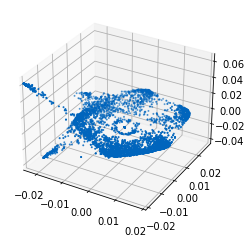

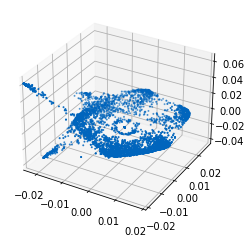

In [11]:
target_mapping = selection.transform(dmap.eigenvectors_)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(target_mapping[:,0], target_mapping[:,1], target_mapping[:,2], s=1)
plt.show()

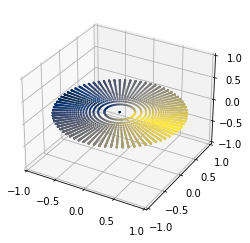